In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cab_data = pd.read_csv("Data/Cab_Data.csv")
customer_id = pd.read_csv("Data/Customer_ID.csv")
transaction_id = pd.read_csv("Data/Transaction_ID.csv")
city = pd.read_csv("Data/City.csv")

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [9]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [11]:
all_cols = list(set(transaction_id.columns.to_list() + city.columns.to_list() + cab_data.columns.to_list() + customer_id.columns.to_list()))
master_df = pd.DataFrame(columns = all_cols)

In [12]:
all_cols

['Customer ID',
 'Price Charged',
 'Company',
 'KM Travelled',
 'Transaction ID',
 'Cost of Trip',
 'Gender',
 'Income (USD/Month)',
 'Population',
 'City',
 'Age',
 'Date of Travel',
 'Users',
 'Payment_Mode']

In [13]:
master_df.columns

Index(['Customer ID', 'Price Charged', 'Company', 'KM Travelled',
       'Transaction ID', 'Cost of Trip', 'Gender', 'Income (USD/Month)',
       'Population', 'City', 'Age', 'Date of Travel', 'Users', 'Payment_Mode'],
      dtype='object')

In [14]:
master_df

,Customer ID,Price Charged,Company,KM Travelled,Transaction ID,Cost of Trip,Gender,Income (USD/Month),Population,City,Age,Date of Travel,Users,Payment_Mode


In [15]:
new_cols = []
for col in master_df.columns:
    col = col.replace(" ", "_")
    col = col.lower()
    new_cols.append(col)

In [16]:
master_df.columns = new_cols

In [17]:
master_df

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode


In [18]:
cab_cols = []
for col in cab_data.columns:
    col = col.replace(" ", "_")
    col = col.lower()
    cab_cols.append(col)
cab_data.columns = cab_cols

master_df = pd.concat([master_df, cab_data])

In [19]:
master_df

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,NaN,370.95,Pink Cab,30.45,10000011,313.635,NaN,NaN,NaN,ATLANTA GA,NaN,42377,NaN,NaN
1,NaN,358.52,Pink Cab,28.62,10000012,334.854,NaN,NaN,NaN,ATLANTA GA,NaN,42375,NaN,NaN
2,NaN,125.2,Pink Cab,9.04,10000013,97.632,NaN,NaN,NaN,ATLANTA GA,NaN,42371,NaN,NaN
3,NaN,377.4,Pink Cab,33.17,10000014,351.602,NaN,NaN,NaN,ATLANTA GA,NaN,42376,NaN,NaN
4,NaN,114.62,Pink Cab,8.73,10000015,97.776,NaN,NaN,NaN,ATLANTA GA,NaN,42372,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,NaN,69.24,Yellow Cab,4.8,10440101,63.36,NaN,NaN,NaN,WASHINGTON DC,NaN,43108,NaN,NaN
359388,NaN,113.75,Yellow Cab,8.4,10440104,106.848,NaN,NaN,NaN,WASHINGTON DC,NaN,43104,NaN,NaN
359389,NaN,437.07,Yellow Cab,27.75,10440105,349.65,NaN,NaN,NaN,WASHINGTON DC,NaN,43105,NaN,NaN
359390,NaN,146.19,Yellow Cab,8.8,10440106,114.048,NaN,NaN,NaN,WASHINGTON DC,NaN,43105,NaN,NaN


In [20]:
cities = city["City"].value_counts().index

for c in cities:
    city_len = len(master_df[master_df["city"] == c]["population"])
    city_pop = int(city[city["City"] == c]["Population"].values[0].strip().replace(",", ""))
    city_users = int(city[city["City"] == c]["Users"].values[0].strip().replace(",", ""))
    master_df.loc[master_df["city"] == c, "population"] = [city_pop]*city_len
    master_df.loc[master_df["city"] == c, "users"] = [city_users]*city_len

In [21]:
master_df

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,NaN,370.95,Pink Cab,30.45,10000011,313.635,NaN,NaN,814885,ATLANTA GA,NaN,42377,24701,NaN
1,NaN,358.52,Pink Cab,28.62,10000012,334.854,NaN,NaN,814885,ATLANTA GA,NaN,42375,24701,NaN
2,NaN,125.2,Pink Cab,9.04,10000013,97.632,NaN,NaN,814885,ATLANTA GA,NaN,42371,24701,NaN
3,NaN,377.4,Pink Cab,33.17,10000014,351.602,NaN,NaN,814885,ATLANTA GA,NaN,42376,24701,NaN
4,NaN,114.62,Pink Cab,8.73,10000015,97.776,NaN,NaN,814885,ATLANTA GA,NaN,42372,24701,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,NaN,69.24,Yellow Cab,4.8,10440101,63.36,NaN,NaN,418859,WASHINGTON DC,NaN,43108,127001,NaN
359388,NaN,113.75,Yellow Cab,8.4,10440104,106.848,NaN,NaN,418859,WASHINGTON DC,NaN,43104,127001,NaN
359389,NaN,437.07,Yellow Cab,27.75,10440105,349.65,NaN,NaN,418859,WASHINGTON DC,NaN,43105,127001,NaN
359390,NaN,146.19,Yellow Cab,8.8,10440106,114.048,NaN,NaN,418859,WASHINGTON DC,NaN,43105,127001,NaN


In [22]:
def trans_user(t):
    global transaction_id
    user = int(transaction_id[transaction_id["Transaction ID"] == t]["Customer ID"].values[0])
    return user
def trans_pay(t):
    global transaction_id
    payment = transaction_id[transaction_id["Transaction ID"] == t]["Payment_Mode"].values[0]
    return payment

In [23]:
master_df["customer_id"] = master_df["transaction_id"].apply(trans_user)
master_df["payment_mode"] = master_df["transaction_id"].apply(trans_pay)

In [24]:
master_df

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,29290,370.95,Pink Cab,30.45,10000011,313.635,NaN,NaN,814885,ATLANTA GA,NaN,42377,24701,Card
1,27703,358.52,Pink Cab,28.62,10000012,334.854,NaN,NaN,814885,ATLANTA GA,NaN,42375,24701,Card
2,28712,125.2,Pink Cab,9.04,10000013,97.632,NaN,NaN,814885,ATLANTA GA,NaN,42371,24701,Cash
3,28020,377.4,Pink Cab,33.17,10000014,351.602,NaN,NaN,814885,ATLANTA GA,NaN,42376,24701,Cash
4,27182,114.62,Pink Cab,8.73,10000015,97.776,NaN,NaN,814885,ATLANTA GA,NaN,42372,24701,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52392,69.24,Yellow Cab,4.8,10440101,63.36,NaN,NaN,418859,WASHINGTON DC,NaN,43108,127001,Cash
359388,53286,113.75,Yellow Cab,8.4,10440104,106.848,NaN,NaN,418859,WASHINGTON DC,NaN,43104,127001,Cash
359389,52265,437.07,Yellow Cab,27.75,10440105,349.65,NaN,NaN,418859,WASHINGTON DC,NaN,43105,127001,Cash
359390,52175,146.19,Yellow Cab,8.8,10440106,114.048,NaN,NaN,418859,WASHINGTON DC,NaN,43105,127001,Card


In [25]:
def user_gender(u):
    global customer_id
    gender = customer_id[customer_id["Customer ID"] == u]["Gender"].values[0]
    return gender
def user_age(u):
    global customer_id
    age = customer_id[customer_id["Customer ID"] == u]["Age"].values[0]
    return age
def user_income(u):
    global customer_id
    income = customer_id[customer_id["Customer ID"] == u]["Income (USD/Month)"].values[0]
    return income

In [26]:
master_df["gender"] = master_df["customer_id"].apply(user_gender)
master_df["age"] = master_df["customer_id"].apply(user_age)
master_df["income_(usd/month)"] = master_df["customer_id"].apply(user_income)

In [27]:
master_df

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,29290,370.95,Pink Cab,30.45,10000011,313.635,Male,10813,814885,ATLANTA GA,28,42377,24701,Card
1,27703,358.52,Pink Cab,28.62,10000012,334.854,Male,9237,814885,ATLANTA GA,27,42375,24701,Card
2,28712,125.2,Pink Cab,9.04,10000013,97.632,Male,11242,814885,ATLANTA GA,53,42371,24701,Cash
3,28020,377.4,Pink Cab,33.17,10000014,351.602,Male,23327,814885,ATLANTA GA,23,42376,24701,Cash
4,27182,114.62,Pink Cab,8.73,10000015,97.776,Male,8536,814885,ATLANTA GA,33,42372,24701,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,52392,69.24,Yellow Cab,4.8,10440101,63.36,Male,15651,418859,WASHINGTON DC,24,43108,127001,Cash
359388,53286,113.75,Yellow Cab,8.4,10440104,106.848,Male,6528,418859,WASHINGTON DC,32,43104,127001,Cash
359389,52265,437.07,Yellow Cab,27.75,10440105,349.65,Male,7966,418859,WASHINGTON DC,56,43105,127001,Cash
359390,52175,146.19,Yellow Cab,8.8,10440106,114.048,Male,6423,418859,WASHINGTON DC,32,43105,127001,Card


In [28]:
master_df.isna().sum()

customer_id           0
price_charged         0
company               0
km_travelled          0
transaction_id        0
cost_of_trip          0
gender                0
income_(usd/month)    0
population            0
city                  0
age                   0
date_of_travel        0
users                 0
payment_mode          0
dtype: int64

In [31]:
master_df.to_csv("Data/master_data.csv", index=False)

In [2]:
df_full = pd.read_csv("Data/master_data.csv")

In [3]:
df_full.head()

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,29290,370.95,Pink Cab,30.45,10000011,313.635,Male,10813,814885,ATLANTA GA,28,42377,24701,Card
1,27703,358.52,Pink Cab,28.62,10000012,334.854,Male,9237,814885,ATLANTA GA,27,42375,24701,Card
2,28712,125.20,Pink Cab,9.04,10000013,97.632,Male,11242,814885,ATLANTA GA,53,42371,24701,Cash
3,28020,377.40,Pink Cab,33.17,10000014,351.602,Male,23327,814885,ATLANTA GA,23,42376,24701,Cash
4,27182,114.62,Pink Cab,8.73,10000015,97.776,Male,8536,814885,ATLANTA GA,33,42372,24701,Card


In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         359392 non-null  int64  
 1   price_charged       359392 non-null  float64
 2   company             359392 non-null  object 
 3   km_travelled        359392 non-null  float64
 4   transaction_id      359392 non-null  int64  
 5   cost_of_trip        359392 non-null  float64
 6   gender              359392 non-null  object 
 7   income_(usd/month)  359392 non-null  int64  
 8   population          359392 non-null  int64  
 9   city                359392 non-null  object 
 10  age                 359392 non-null  int64  
 11  date_of_travel      359392 non-null  int64  
 12  users               359392 non-null  int64  
 13  payment_mode        359392 non-null  object 
dtypes: float64(3), int64(7), object(4)
memory usage: 38.4+ MB


In [5]:
df_full.company.value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: company, dtype: int64

In [8]:
pink_data = df_full[df_full["company"] == "Pink Cab"]

In [9]:
pink_data.head()

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,29290,370.95,Pink Cab,30.45,10000011,313.635,Male,10813,814885,ATLANTA GA,28,42377,24701,Card
1,27703,358.52,Pink Cab,28.62,10000012,334.854,Male,9237,814885,ATLANTA GA,27,42375,24701,Card
2,28712,125.20,Pink Cab,9.04,10000013,97.632,Male,11242,814885,ATLANTA GA,53,42371,24701,Cash
3,28020,377.40,Pink Cab,33.17,10000014,351.602,Male,23327,814885,ATLANTA GA,23,42376,24701,Cash
4,27182,114.62,Pink Cab,8.73,10000015,97.776,Male,8536,814885,ATLANTA GA,33,42372,24701,Card


In [10]:
yellow_data = df_full[df_full["company"] == "Yellow Cab"]

In [11]:
yellow_data.head()

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
233,27602,1341.17,Yellow Cab,33.93,10000384,464.1624,Male,8542,814885,ATLANTA GA,23,42371,24701,Card
234,27594,1412.06,Yellow Cab,42.18,10000385,516.2832,Male,3901,814885,ATLANTA GA,28,42378,24701,Cash
235,27884,364.62,Yellow Cab,10.60,10000386,132.2880,Male,13505,814885,ATLANTA GA,32,42372,24701,Cash
236,28533,838.00,Yellow Cab,26.75,10000387,333.8400,Male,28386,814885,ATLANTA GA,39,42375,24701,Cash
237,29039,1540.61,Yellow Cab,46.02,10000388,596.4192,Male,17761,814885,ATLANTA GA,35,42376,24701,Card


In [12]:
#Check null values:
yellow_data.isna().sum()

customer_id           0
price_charged         0
company               0
km_travelled          0
transaction_id        0
cost_of_trip          0
gender                0
income_(usd/month)    0
population            0
city                  0
age                   0
date_of_travel        0
users                 0
payment_mode          0
dtype: int64

In [13]:
pink_data.isna().sum()

customer_id           0
price_charged         0
company               0
km_travelled          0
transaction_id        0
cost_of_trip          0
gender                0
income_(usd/month)    0
population            0
city                  0
age                   0
date_of_travel        0
users                 0
payment_mode          0
dtype: int64

In [14]:
from datetime import datetime as dt
pink_data = pink_data.sort_values("date_of_travel").reset_index()

In [15]:
pink_data = pink_data.drop(columns = "index")

In [16]:
pink_data

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,22469,114.15,Pink Cab,8.55,10000164,89.775,Male,4378,943999,PHOENIX AZ,37,42371,6133,Card
1,3330,500.22,Pink Cab,35.34,10000060,395.808,Male,5216,1955130,CHICAGO IL,46,42371,164468,Card
2,30718,61.30,Pink Cab,7.02,10000070,82.836,Male,20255,754233,DENVER CO,52,42371,12421,Cash
3,7539,850.87,Pink Cab,38.00,10000127,425.600,Male,24169,1595037,LOS ANGELES CA,40,42371,144132,Card
4,39975,94.49,Pink Cab,5.40,10000370,58.320,Male,7931,631442,TUCSON AZ,40,42371,5712,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84706,8034,466.14,Pink Cab,38.00,10436963,402.800,Male,12544,1595037,LOS ANGELES CA,36,43465,144132,Cash
84707,900,741.22,Pink Cab,42.00,10433575,504.000,Female,11580,8405837,NEW YORK NY,29,43465,302149,Card
84708,30591,326.91,Pink Cab,19.98,10433249,217.782,Male,4968,754233,DENVER CO,30,43465,12421,Card
84709,7115,511.41,Pink Cab,38.94,10433255,412.764,Female,32791,1595037,LOS ANGELES CA,64,43465,144132,Card


In [17]:
def convert_to_date(date):
    true_date = pd.to_datetime(date, yearfirst=True) + pd.Timedelta(weeks = 46*52, days = 87)
    strdate = dt.strftime(true_date, format ="%Y/%m/%d")
    datef = dt.strptime(strdate, "%Y/%m/%d")
    return(datef)

In [18]:
pink_data["date_of_travel"] = pink_data["date_of_travel"].apply(convert_to_date)

In [19]:
yellow_data = yellow_data.sort_values("date_of_travel").reset_index()
yellow_data = yellow_data.drop(columns = "index")
yellow_data["date_of_travel"] = yellow_data["date_of_travel"].apply(convert_to_date)

In [20]:
yellow_data.head()

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,27602,1341.17,Yellow Cab,33.93,10000384,464.1624,Male,8542,814885,ATLANTA GA,23,2016-01-31,24701,Card
1,7500,490.31,Yellow Cab,18.90,10000706,235.8720,Male,22859,1595037,LOS ANGELES CA,30,2016-01-31,144132,Cash
2,7936,179.26,Yellow Cab,6.84,10000705,93.5712,Male,9678,1595037,LOS ANGELES CA,60,2016-01-31,144132,Cash
3,4551,51.47,Yellow Cab,2.18,10000525,26.4216,Male,6316,1955130,CHICAGO IL,19,2016-01-31,164468,Cash
4,3820,397.98,Yellow Cab,16.80,10000526,205.6320,Male,18836,1955130,CHICAGO IL,39,2016-01-31,164468,Card


In [21]:
pink_data.head()

,customer_id,price_charged,company,km_travelled,transaction_id,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode
0,22469,114.15,Pink Cab,8.55,10000164,89.775,Male,4378,943999,PHOENIX AZ,37,2016-01-31,6133,Card
1,3330,500.22,Pink Cab,35.34,10000060,395.808,Male,5216,1955130,CHICAGO IL,46,2016-01-31,164468,Card
2,30718,61.30,Pink Cab,7.02,10000070,82.836,Male,20255,754233,DENVER CO,52,2016-01-31,12421,Cash
3,7539,850.87,Pink Cab,38.00,10000127,425.600,Male,24169,1595037,LOS ANGELES CA,40,2016-01-31,144132,Card
4,39975,94.49,Pink Cab,5.40,10000370,58.320,Male,7931,631442,TUCSON AZ,40,2016-01-31,5712,Card


In [22]:
pink_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84711 entries, 0 to 84710
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         84711 non-null  int64         
 1   price_charged       84711 non-null  float64       
 2   company             84711 non-null  object        
 3   km_travelled        84711 non-null  float64       
 4   transaction_id      84711 non-null  int64         
 5   cost_of_trip        84711 non-null  float64       
 6   gender              84711 non-null  object        
 7   income_(usd/month)  84711 non-null  int64         
 8   population          84711 non-null  int64         
 9   city                84711 non-null  object        
 10  age                 84711 non-null  int64         
 11  date_of_travel      84711 non-null  datetime64[ns]
 12  users               84711 non-null  int64         
 13  payment_mode        84711 non-null  object    

In [23]:
pink_data["price_charged"] = pink_data["price_charged"].astype(float)
pink_data["km_travelled"] = pink_data["km_travelled"].astype(float)
pink_data["cost_of_trip"] = pink_data["cost_of_trip"].astype(float)
pink_data["population"] = pink_data["population"].astype(float)
pink_data["users"] = pink_data["users"].astype(float)

In [24]:
yellow_data["price_charged"] = yellow_data["price_charged"].astype(float)
yellow_data["km_travelled"] = yellow_data["km_travelled"].astype(float)
yellow_data["cost_of_trip"] = yellow_data["cost_of_trip"].astype(float)
yellow_data["population"] = yellow_data["population"].astype(float)
yellow_data["users"] = yellow_data["users"].astype(float)

Descriptive Statistics is for columns price_charged :
 count    84711.000000
mean       310.800856
std        181.995661
min         15.600000
25%        159.970000
50%        298.060000
75%        441.505000
max       1623.480000
Name: price_charged, dtype: float64


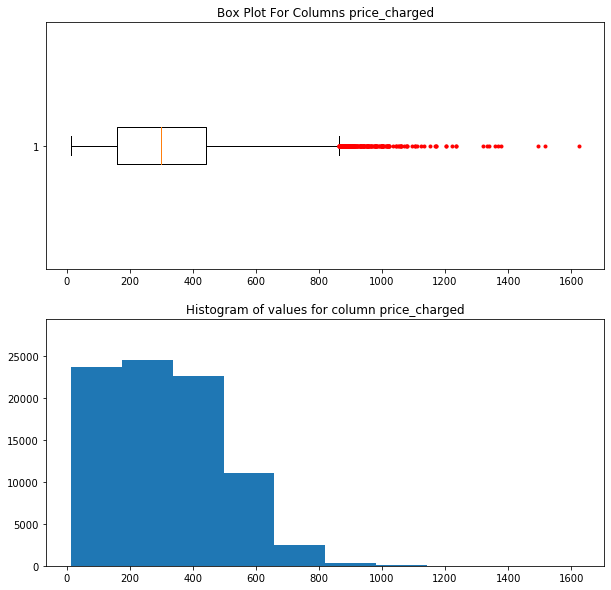

Descriptive Statistics is for columns km_travelled :
 count    84711.000000
mean        22.559917
std         12.231092
min          1.900000
25%         12.000000
50%         22.440000
75%         32.960000
max         48.000000
Name: km_travelled, dtype: float64


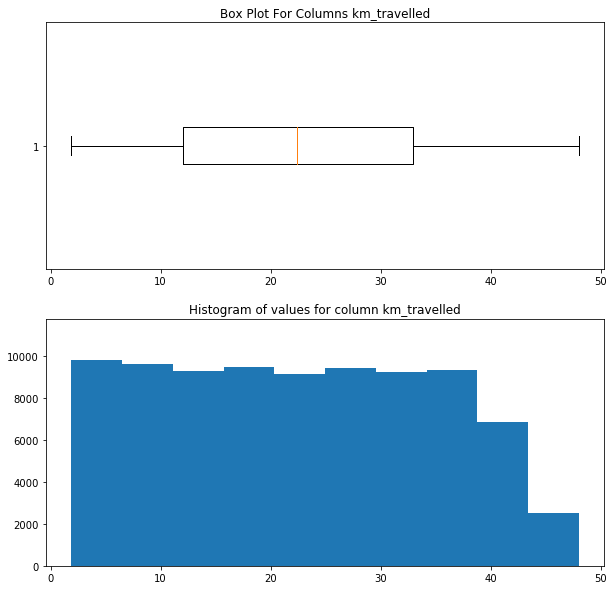

Descriptive Statistics is for columns cost_of_trip :
 count    84711.000000
mean       248.148682
std        135.403345
min         19.000000
25%        131.868000
50%        246.330000
75%        360.180000
max        576.000000
Name: cost_of_trip, dtype: float64


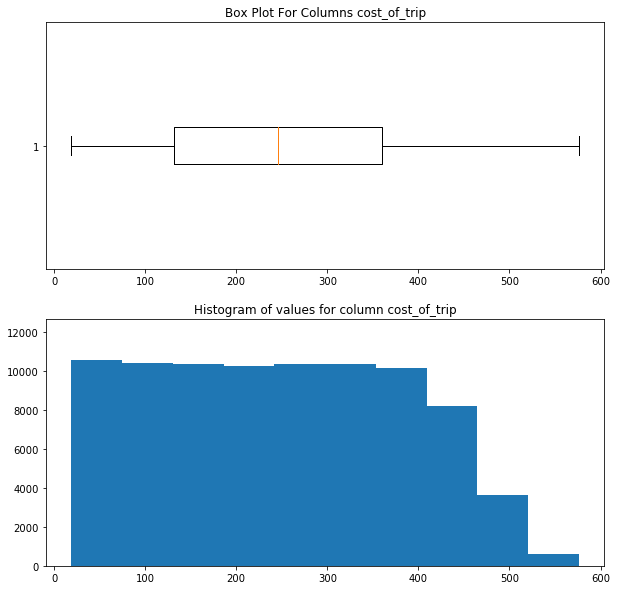

Descriptive Statistics is for columns income_(usd/month) :
 count    84711.000000
mean     15059.047137
std       7991.077762
min       2000.000000
25%       8371.000000
50%      14713.000000
75%      21055.000000
max      35000.000000
Name: income_(usd/month), dtype: float64


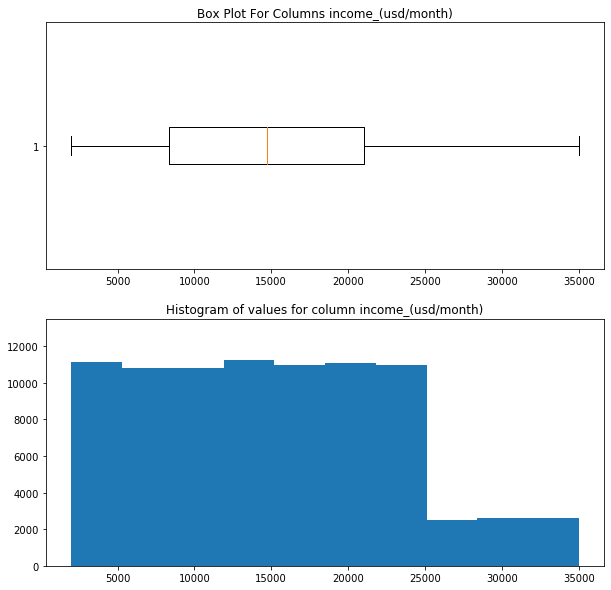

Descriptive Statistics is for columns population :
 count    8.471100e+04
mean     2.350642e+06
std      2.734890e+06
min      2.489680e+05
25%      8.148850e+05
50%      1.595037e+06
75%      1.955130e+06
max      8.405837e+06
Name: population, dtype: float64


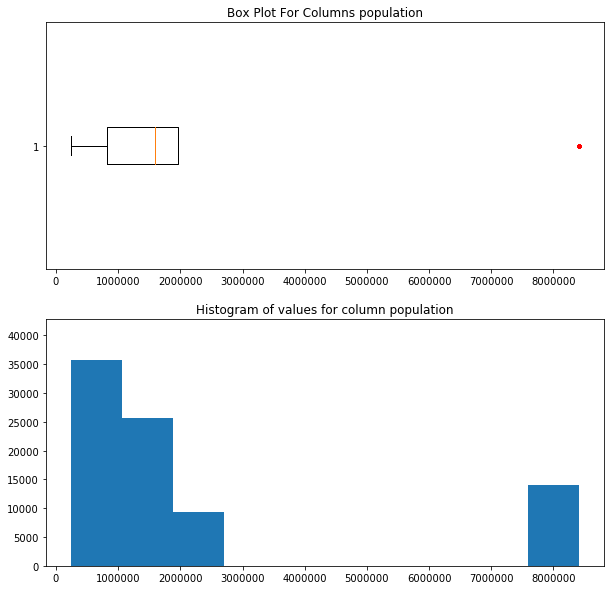

Descriptive Statistics is for columns age :
 count    84711.000000
mean        35.322414
std         12.644780
min         18.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         65.000000
Name: age, dtype: float64


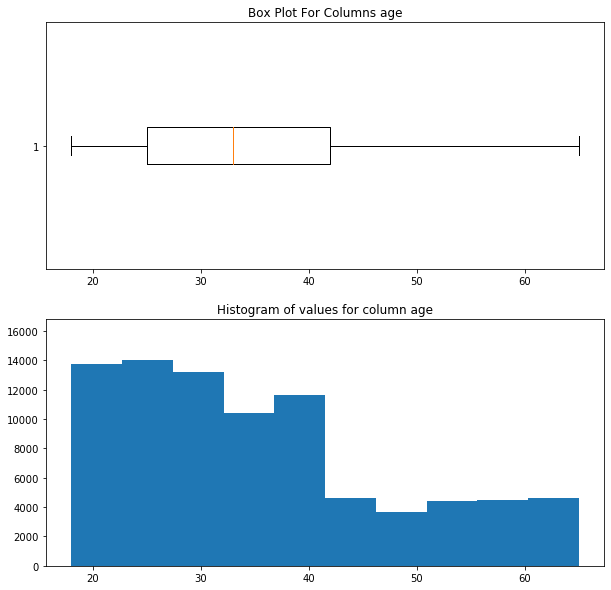

Descriptive Statistics is for columns users :
 count     84711.000000
mean     125590.813330
std       94593.433659
min        3643.000000
25%       27247.000000
50%      144132.000000
75%      164468.000000
max      302149.000000
Name: users, dtype: float64


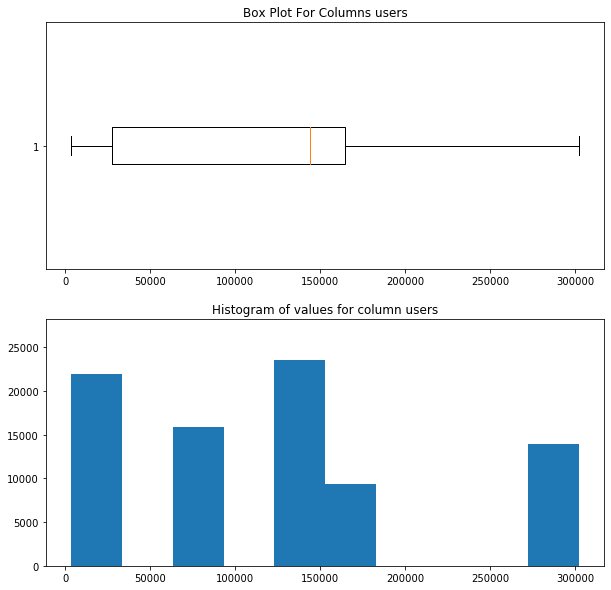

In [25]:
#Numerical coulmns Pink:
for i in pink_data.drop(columns = ["customer_id", "transaction_id"]).columns.to_list():
    if(str(pink_data[i].dtype) == 'int64') | (str(pink_data[i].dtype) == 'float64'):
        # Print Statistics of it
        print("Descriptive Statistics is for columns {} :\n {}".format(i, pink_data[i].describe()))
        fig, ax = plt.subplots(2,1, figsize = (10,10))
        ax[0].set_title(f"Box Plot For Columns {i}")
        ax[0].boxplot(pink_data[i], vert = False, sym = "r.")
        ax[1].set_title(f"Histogram of values for column {i}")
        r = ax[1].hist(pink_data[i], histtype = "bar")
        ax[1].set_ylim(top = np.max(r[0]) + 0.2*np.max(r[0]) )
        plt.show()

Descriptive Statistics is for columns price_charged :
 count    274681.000000
mean        458.181990
std         288.386166
min          20.730000
25%         226.680000
50%         425.060000
75%         633.880000
max        2048.030000
Name: price_charged, dtype: float64


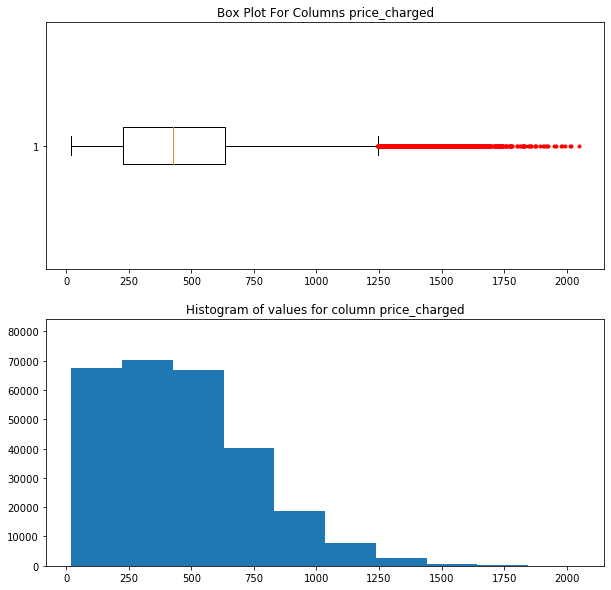

Descriptive Statistics is for columns km_travelled :
 count    274681.000000
mean         22.569517
std          12.234298
min           1.900000
25%          11.990000
50%          22.440000
75%          32.960000
max          48.000000
Name: km_travelled, dtype: float64


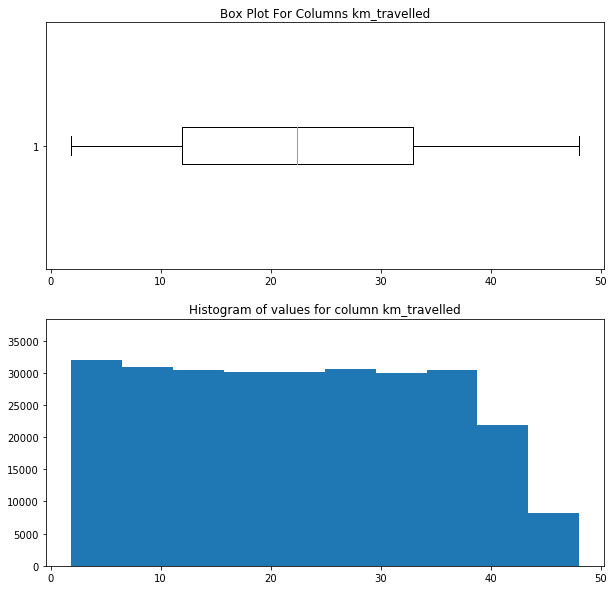

Descriptive Statistics is for columns cost_of_trip :
 count    274681.000000
mean        297.922004
std         162.548986
min          22.800000
25%         158.400000
50%         295.596000
75%         432.432000
max         691.200000
Name: cost_of_trip, dtype: float64


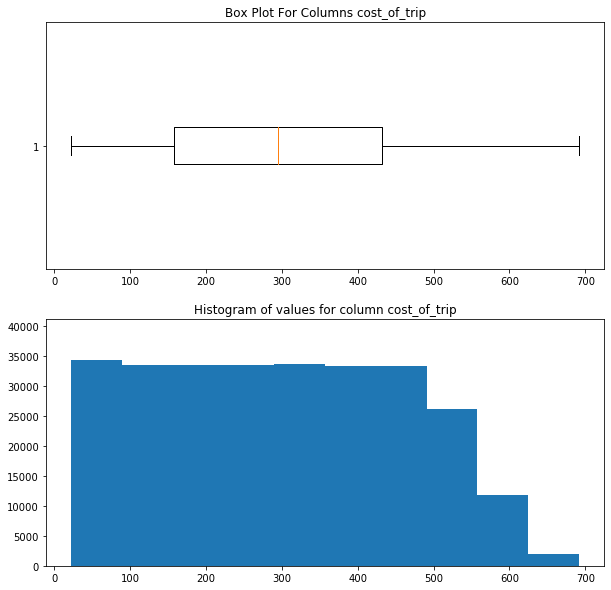

Descriptive Statistics is for columns income_(usd/month) :
 count    274681.000000
mean      15045.669817
std        7962.727062
min        2000.000000
25%        8439.000000
50%       14676.000000
75%       21023.000000
max       34996.000000
Name: income_(usd/month), dtype: float64


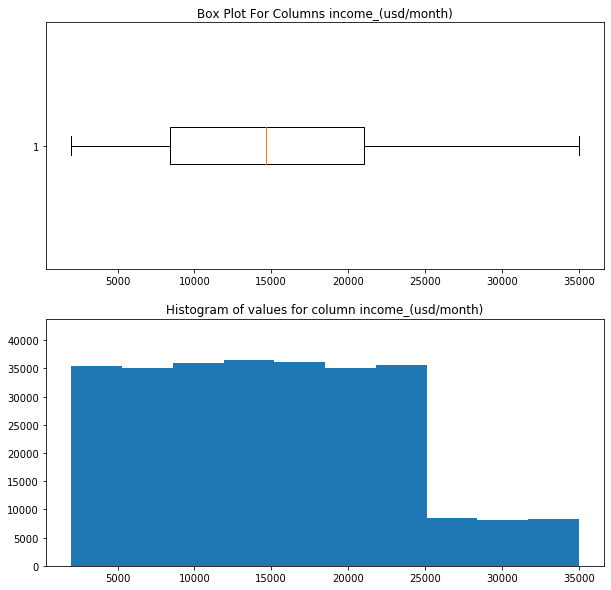

Descriptive Statistics is for columns population :
 count    2.746810e+05
mean     3.373228e+06
std      3.439014e+06
min      2.489680e+05
25%      6.712380e+05
50%      1.595037e+06
75%      8.405837e+06
max      8.405837e+06
Name: population, dtype: float64


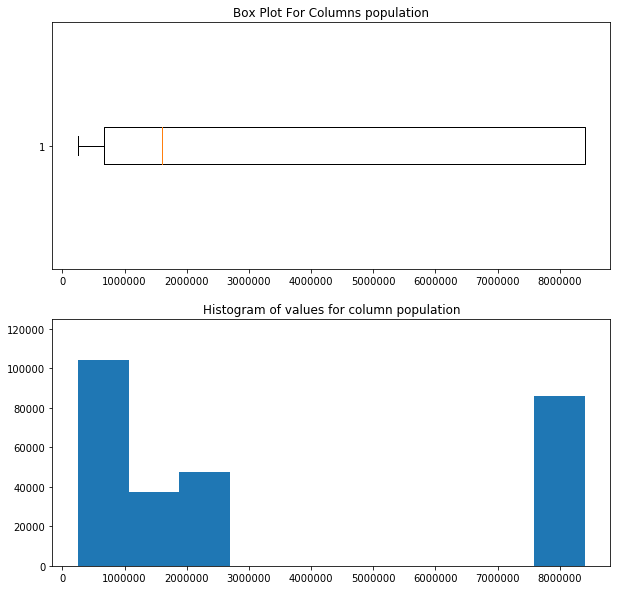

Descriptive Statistics is for columns age :
 count    274681.000000
mean         35.341112
std          12.578625
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: age, dtype: float64


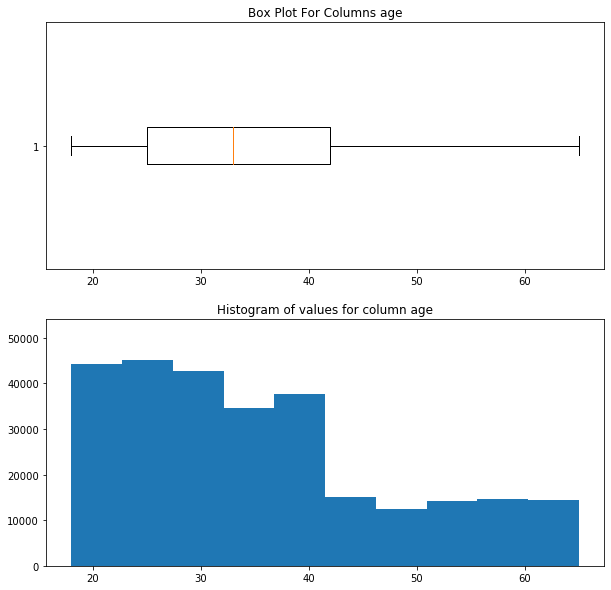

Descriptive Statistics is for columns users :
 count    274681.000000
mean     168473.246981
std      100570.558887
min        3643.000000
25%       80021.000000
50%      144132.000000
75%      302149.000000
max      302149.000000
Name: users, dtype: float64


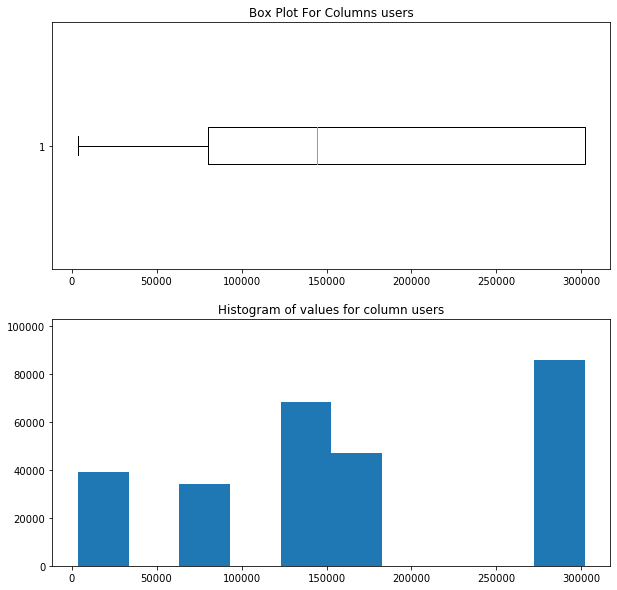

In [26]:
#Numerical coulmns Yellow:
for i in yellow_data.drop(columns = ["customer_id", "transaction_id"]).columns.to_list():
    if(str(yellow_data[i].dtype) == 'int64') | (str(yellow_data[i].dtype) == 'float64'):
        # Print Statistics of it
        print("Descriptive Statistics is for columns {} :\n {}".format(i, yellow_data[i].describe()))
        fig, ax = plt.subplots(2,1, figsize = (10,10))
        ax[0].set_title(f"Box Plot For Columns {i}")
        ax[0].boxplot(yellow_data[i], vert = False, sym = "r.")
        ax[1].set_title(f"Histogram of values for column {i}")
        r = ax[1].hist(yellow_data[i], histtype = "bar")
        ax[1].set_ylim(top = np.max(r[0]) + 0.2*np.max(r[0]) )
        plt.show()

In [27]:
#Categorical values pink
for i in pink_data.columns.to_list():
    if str(pink_data[i].dtype) == 'object':
        print(f" ============ Categorical Columns {i} ===========")
        print(f" ============ Unique Values ===========")
        print(pink_data[i].unique())
        print(f" ============ Value Counts ===========")
        print(pink_data[i].value_counts())

 ============ Categorical Columns company ===========
 ============ Unique Values ===========
['Pink Cab']
 ============ Value Counts ===========
Pink Cab    84711
Name: company, dtype: int64
 ============ Categorical Columns gender ===========
 ============ Unique Values ===========
['Male' 'Female']
 ============ Value Counts ===========
Male      47231
Female    37480
Name: gender, dtype: int64
 ============ Categorical Columns city ===========
 ============ Unique Values ===========
['PHOENIX AZ' 'CHICAGO IL' 'DENVER CO' 'LOS ANGELES CA' 'TUCSON AZ'
 'SEATTLE WA' 'SAN DIEGO CA' 'DALLAS TX' 'WASHINGTON DC' 'ATLANTA GA'
 'NEW YORK NY' 'SILICON VALLEY' 'MIAMI FL' 'BOSTON MA' 'ORANGE COUNTY'
 'SACRAMENTO CA' 'AUSTIN TX' 'PITTSBURGH PA' 'NASHVILLE TN']
 ============ Value Counts ===========
LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI F

In [28]:
#Categorical values yellow
for i in yellow_data.columns.to_list():
    if str(yellow_data[i].dtype) == 'object':
        print(f" ============ Categorical Columns {i} ===========")
        print(f" ============ Unique Values ===========")
        print(yellow_data[i].unique())
        print(f" ============ Value Counts ===========")
        print(yellow_data[i].value_counts())

 ============ Categorical Columns company ===========
 ============ Unique Values ===========
['Yellow Cab']
 ============ Value Counts ===========
Yellow Cab    274681
Name: company, dtype: int64
 ============ Categorical Columns gender ===========
 ============ Unique Values ===========
['Male' 'Female']
 ============ Value Counts ===========
Male      158681
Female    116000
Name: gender, dtype: int64
 ============ Categorical Columns city ===========
 ============ Unique Values ===========
['ATLANTA GA' 'LOS ANGELES CA' 'CHICAGO IL' 'SAN DIEGO CA' 'WASHINGTON DC'
 'NEW YORK NY' 'SACRAMENTO CA' 'PHOENIX AZ' 'SEATTLE WA' 'NASHVILLE TN'
 'DALLAS TX' 'DENVER CO' 'SILICON VALLEY' 'TUCSON AZ' 'BOSTON MA'
 'AUSTIN TX' 'ORANGE COUNTY' 'MIAMI FL' 'PITTSBURGH PA']
 ============ Value Counts ===========
NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637


## Feature Engineering:
- Adding State column
    - editing silicon valey
- Adding Cost per km
- adding price km
- Adding profit col
- Adding Company Popularity (Users / Population)
- Adding income calsses
- Deleting transaction ID
- Deleting Customer ID or can we use it?

In [29]:
# Adding State Column: #Silicon Valey is located in california
pink_data["city"] = pink_data["city"].replace({"SILICON VALLEY" : "SILICON VALLEY CA"
                                               , "ORANGE COUNTY": "ORANGE COUNTY CA"})
yellow_data["city"] = yellow_data["city"].replace({"SILICON VALLEY" : "SILICON VALLEY CA",
                                               "ORANGE COUNTY": "ORANGE COUNTY CA"})

In [30]:
def get_state(city):
    state = city[-2:]
    return state

In [31]:
pink_data["state"] = pink_data["city"].apply(get_state)
yellow_data["state"] = yellow_data["city"].apply(get_state)

In [32]:
def del_state_form_city(city):
    x = city[:-3]
    return x

In [33]:
pink_data["city"] = pink_data["city"].apply(del_state_form_city)
yellow_data["city"] = yellow_data["city"].apply(del_state_form_city)

In [34]:
## Cost Per Kilometer
pink_data["cost/km"] =  pink_data["cost_of_trip"] / pink_data["km_travelled"]
yellow_data["cost/km"] =  yellow_data["cost_of_trip"] / yellow_data["km_travelled"]

In [35]:
## price Per Kilometer
pink_data["price/km"] =  pink_data["price_charged"] / pink_data["km_travelled"]
yellow_data["price/km"] =  yellow_data["price_charged"] / yellow_data["km_travelled"]

In [36]:
## Profit of the data
pink_data["profit"] =  pink_data["price_charged"]  - pink_data["cost_of_trip"]
yellow_data["profit"] =  yellow_data["price_charged"]  - yellow_data["cost_of_trip"]

In [38]:
## Delting transaction ID
pink_data = pink_data.drop(columns = "transaction_id")
yellow_data = yellow_data.drop(columns = "transaction_id")

In [39]:
## Adding age level:
def age_level(age):
    if age>50:
        return "Senior Adult"
    elif((age <= 50 )&(age > 30)):
        return "Mid Age Adult"
    elif((age <= 30 )&(age > 18)):
        return "Adult"
    else:
        return "Teenager"

In [40]:
pink_data["age_level"] = pink_data["age"].apply(age_level)
yellow_data["age_level"] = yellow_data["age"].apply(age_level)

In [41]:
## Getting Customer Class:
def get_income_class(income):
    yearly_income = 12 * income
    if(yearly_income < 52000):
        return "C"
    elif(yearly_income >= 52000)&(yearly_income < 156600):
        return "B"
    else:
        return "A"

In [42]:
pink_data["customer_level"]= pink_data["income_(usd/month)"].apply(get_income_class)
yellow_data["customer_level"]= yellow_data["income_(usd/month)"].apply(get_income_class)

In [43]:
pink_data.head()

,customer_id,price_charged,company,km_travelled,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode,state,cost/km,price/km,profit,popularity,age_level,customer_level
0,22469,114.15,Pink Cab,8.55,89.775,Male,4378,943999.0,PHOENIX,37,2016-01-31,6133.0,Card,AZ,10.5,13.350877,24.375,0.649683,Mid Age Adult,B
1,3330,500.22,Pink Cab,35.34,395.808,Male,5216,1955130.0,CHICAGO,46,2016-01-31,164468.0,Card,IL,11.2,14.154499,104.412,8.412126,Mid Age Adult,B
2,30718,61.30,Pink Cab,7.02,82.836,Male,20255,754233.0,DENVER,52,2016-01-31,12421.0,Cash,CO,11.8,8.732194,-21.536,1.646839,Senior Adult,A
3,7539,850.87,Pink Cab,38.00,425.600,Male,24169,1595037.0,LOS ANGELES,40,2016-01-31,144132.0,Card,CA,11.2,22.391316,425.270,9.036279,Mid Age Adult,A
4,39975,94.49,Pink Cab,5.40,58.320,Male,7931,631442.0,TUCSON,40,2016-01-31,5712.0,Card,AZ,10.8,17.498148,36.170,0.904596,Mid Age Adult,B


In [44]:
yellow_data.head()

,customer_id,price_charged,company,km_travelled,cost_of_trip,gender,income_(usd/month),population,city,age,date_of_travel,users,payment_mode,state,cost/km,price/km,profit,popularity,age_level,customer_level
0,27602,1341.17,Yellow Cab,33.93,464.1624,Male,8542,814885.0,ATLANTA,23,2016-01-31,24701.0,Card,GA,13.68,39.527557,877.0076,3.031225,Adult,B
1,7500,490.31,Yellow Cab,18.90,235.8720,Male,22859,1595037.0,LOS ANGELES,30,2016-01-31,144132.0,Cash,CA,12.48,25.942328,254.4380,9.036279,Adult,A
2,7936,179.26,Yellow Cab,6.84,93.5712,Male,9678,1595037.0,LOS ANGELES,60,2016-01-31,144132.0,Cash,CA,13.68,26.207602,85.6888,9.036279,Senior Adult,B
3,4551,51.47,Yellow Cab,2.18,26.4216,Male,6316,1955130.0,CHICAGO,19,2016-01-31,164468.0,Cash,IL,12.12,23.610092,25.0484,8.412126,Adult,B
4,3820,397.98,Yellow Cab,16.80,205.6320,Male,18836,1955130.0,CHICAGO,39,2016-01-31,164468.0,Card,IL,12.24,23.689286,192.3480,8.412126,Mid Age Adult,A


In [47]:
# Calculating the accurate popularity:
# 331,501,080 Was USA Population
# 60.29 Million was the people under 15 years 
# Here we assume that the people that are elegible to use the companys is +15 Years old
# So we will exclude thier population portion from the population of each city to calculate the correct popularity

def get_acutal_population(population):
    under_15 = 60290000
    under_15_portion = under_15/331501080 
    actual_population = int(population - (under_15_portion*population))
    return actual_population

In [51]:
pink_data["actual_population"] = pink_data["population"].apply(get_acutal_population)

In [53]:
yellow_data["actual_population"] = yellow_data["population"].apply(get_acutal_population)

In [54]:
## Adding Popularity of the company
pink_data["popularity"] =  (pink_data["users"] / pink_data["actual_population"])*100
yellow_data["popularity"] = (yellow_data["users"] / yellow_data["actual_population"])*100

In [78]:
pink_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84711 entries, 0 to 84710
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         84711 non-null  int64         
 1   price_charged       84711 non-null  float64       
 2   company             84711 non-null  object        
 3   km_travelled        84711 non-null  float64       
 4   cost_of_trip        84711 non-null  float64       
 5   gender              84711 non-null  object        
 6   income_(usd/month)  84711 non-null  int64         
 7   population          84711 non-null  float64       
 8   city                84711 non-null  object        
 9   age                 84711 non-null  int64         
 10  date_of_travel      84711 non-null  datetime64[ns]
 11  users               84711 non-null  float64       
 12  payment_mode        84711 non-null  object        
 13  state               84711 non-null  object    

In [79]:
yellow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274681 entries, 0 to 274680
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         274681 non-null  int64         
 1   price_charged       274681 non-null  float64       
 2   company             274681 non-null  object        
 3   km_travelled        274681 non-null  float64       
 4   cost_of_trip        274681 non-null  float64       
 5   gender              274681 non-null  object        
 6   income_(usd/month)  274681 non-null  int64         
 7   population          274681 non-null  float64       
 8   city                274681 non-null  object        
 9   age                 274681 non-null  int64         
 10  date_of_travel      274681 non-null  datetime64[ns]
 11  users               274681 non-null  float64       
 12  payment_mode        274681 non-null  object        
 13  state               274681 no

In [57]:
pink_data.to_csv("Data/pink_data_final.csv", index = False)

In [58]:
yellow_data.to_csv("Data/yellow_data_final.csv", index = False)

# Questions: 
- Charge per user for each company
- KM travelled per company

- Popularity Meaning
- Number of trips Vs Revenue (Scatter)
- Revenue Vs KM (Scatter)
- Profit VS price (Scatter)
- Profit per state 
- User Icome Per month VS KM travelled and number of repetetion (Bar - Histo)
- User Income per month per state (Bar)
- \\ \\ \\\ \\ \\ \\ \\\ \\ City (Bar)
- Gender income (Bar)
- Number of users VS Profit from state (Scatter)
- Mean Income In Cities VS Number of users (Scatter)
- Price Per Age Histo
- Age Distribution (Pie)
- Income per Age (Line)
- Age per Gender (Histo)
- Age , Gender , Payed , Income?
- KM Per population (Scatter)
- Population Per price
- Number of customers per year (Bars)
- Usage per day of week (Line)
- Retainabilty ratio (Pie)

## - Where does the company spread ?

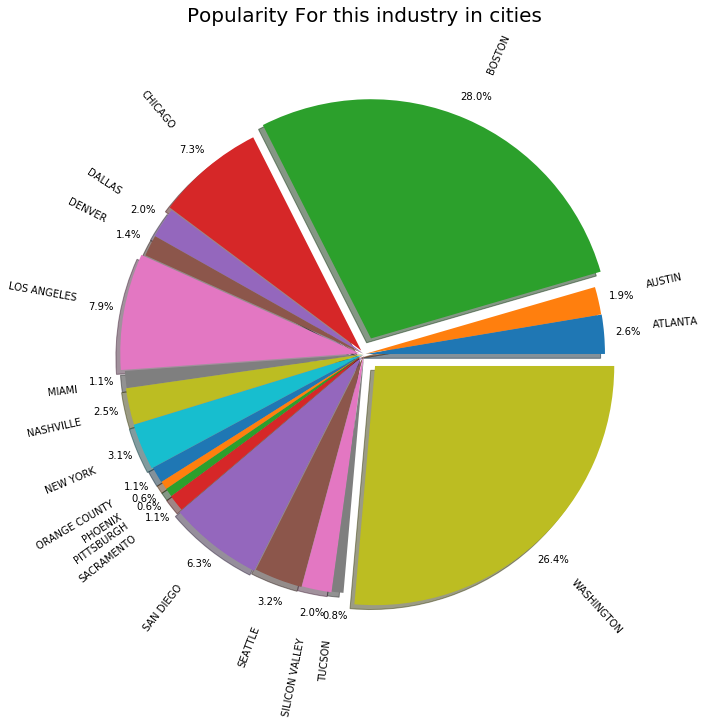

In [97]:
#Popularity distribution for pink company:
plt.figure(figsize =(10,10))
plt.title("Popularity For this industry in cities", y = 1.1, fontsize = 20)
plt.pie(pink_data.groupby("city")["popularity"].mean(), 
        labels =pink_data.groupby("city")["popularity"].mean().index, 
        autopct = '%1.1f%%', explode = 0.002*pink_data.groupby("city")["popularity"].mean().values, 
        shadow = True, pctdistance=1.1, labeldistance=1.2, rotatelabels= True, radius=1.1)
plt.show()

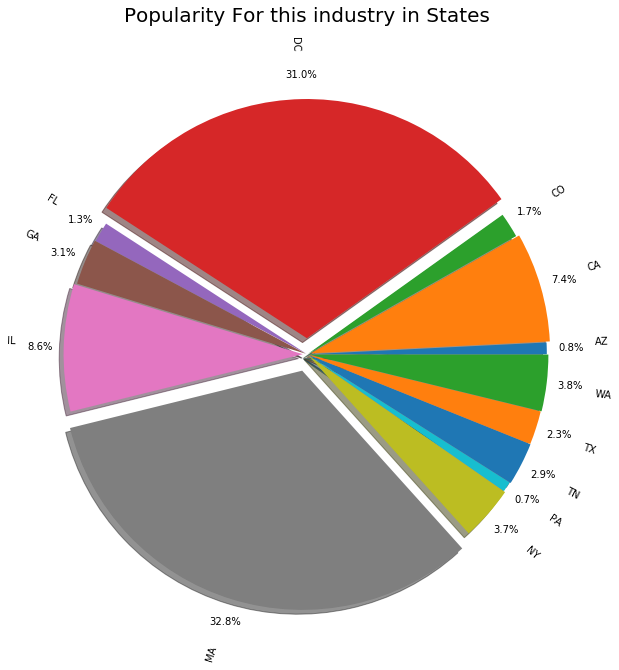

In [96]:
#Popularity distribution for pink company:
plt.figure(figsize =(10,10))
plt.title("Popularity For this industry in States", y = 1.1, fontsize = 20)
plt.pie(pink_data.groupby("state")["popularity"].mean(), 
        labels =pink_data.groupby("state")["popularity"].mean().index, 
        autopct = '%1.1f%%', explode = 0.002*pink_data.groupby("state")["popularity"].mean().values, 
        shadow = True, pctdistance=1.1, labeldistance=1.2, rotatelabels= True, radius=1.1)
plt.show()

- price per KM
- Cost per KM
- Price per city
- Cost per City 
- Profit Per KM in cities

- price per KM
- Cost per KM
- Price per State
- Cost per State
- Profit Per KM in states

- Gender Distribution

- Gender KM travelled

- Revenue time series
- Profit timeseries 